**Plataformas de visualización - DS_C3_SC2_T3**

---


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
pd.options.display.max_rows = 8
pd.options.display.max_columns = 10

1.	Leer en dos dataframes `adolescent_fertility` y `mortality`, el contenido de los archivos AdolescentFertility.csv y Mortality.csv respectivamente, que almacenan por país, las tasas de fecundidad adolescente y mortalidad de menores de 5 años desde 1960. 

La tasa de fecundidad adolescente es el número de nacimientos por cada 1.000 mujeres de 15 a 19 años.

La tasa de mortalidad de menores de cinco años es la probabilidad por cada 1.000 de que un bebé recién nacido muera antes de cumplir los cinco años.


In [11]:
adolescent_fertility = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TLG/DS_C3_SC1_T3_Pruebate/AdolescentFertility.csv")
adolescent_fertility

,Country Name,Country Code,1960,1961,1962,...,2015,2016,2017,2018,2019
0,Aruba,ABW,106.2062,102.8116,99.417,...,25.0092,23.8416,22.674,21.1736,19.6732
1,Afghanistan,AFG,145.2450,145.2450,145.245,...,81.6930,75.3250,68.957,65.1410,61.3250
2,Angola,AGO,202.2000,204.6000,207.000,...,157.2756,153.9008,150.526,147.9580,145.3900
3,Albania,ALB,54.4408,56.1654,57.890,...,20.0772,19.8596,19.642,19.5724,19.5028
...,...,...,...,...,...,...,...,...,...,...,...
260,"Yemen, Rep.",YEM,166.7340,168.4550,170.176,...,63.2800,61.8160,60.352,59.1624,57.9728
261,South Africa,ZAF,79.2902,80.5886,81.887,...,69.5352,68.7216,67.908,67.8488,67.7896
262,Zambia,ZMB,185.1564,187.0312,188.906,...,126.7456,123.4288,120.112,118.3048,116.4976
263,Zimbabwe,ZWE,168.8736,170.2848,171.696,...,95.2182,90.6766,86.135,83.2486,80.3622


In [12]:
mortality = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/TLG/DS_C3_SC1_T3_Pruebate/Mortality.csv")
mortality

,Country Name,Country Code,1960,1961,1962,...,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,344.6,...,70.4,67.6,64.9,62.5,60.3
2,Angola,AGO,NaN,NaN,NaN,...,88.2,84.2,80.6,77.7,74.7
3,Albania,ALB,NaN,NaN,NaN,...,9.6,9.4,9.4,9.5,9.7
...,...,...,...,...,...,...,...,...,...,...,...
260,"Yemen, Rep.",YEM,NaN,NaN,409.8,...,57.1,56.8,57.0,58.5,58.4
261,South Africa,ZAF,NaN,NaN,NaN,...,37.1,36.2,35.6,35.0,34.5
262,Zambia,ZMB,204.8,201.2,197.8,...,68.5,66.5,64.3,63.3,61.7
263,Zimbabwe,ZWE,151.1,146.9,142.6,...,62.0,59.5,58.2,55.9,54.6


2.	A partir de los dataframes anteriores obtén uno donde sólo almacenes la información de México. Haz los cambios necesarios para que quede con la siguiente estructura.

In [13]:
mexico = pd.concat([adolescent_fertility[adolescent_fertility['Country Name']=='Mexico'], mortality[mortality['Country Name']=='Mexico']], axis=0)
mexico.drop(['Country Name','Country Code'],axis=1,inplace=True)
mexico = mexico.T
mexico.index.name = 'Year'
mexico.columns.name = ''
mexico.columns = ['Adolescent Fertility','Mortality']
mexico

,Adolescent Fertility,Mortality
Year,,
1960,116.4508,155.8
1961,116.6804,149.3
1962,116.9100,143.3
1963,116.9100,137.9
...,...,...
2016,61.4860,15.7
2017,60.3650,15.2
2018,59.4542,14.7
2019,58.5434,14.2


3.	Grafica el dataframe anterior, utilizando la plataforma Pandas, para conocer la evolución de estos índices a través de los años. Personaliza las propiedades del gráfico para que se vea como sigue: 

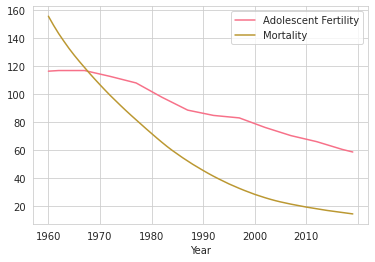

In [14]:
sns.set_style('whitegrid')
sns.set_palette('husl')
mexico.plot()

5.	Usando nuevamente los dataframes `adolescent_fertility` y `mortality`, obtén la información de ambos índices para los países de Norte América, en el 2019. Haz los cambios necesarios para que quede con la siguiente estructura.

In [15]:
north_america = pd.concat([adolescent_fertility[['Country Code','2019']],mortality['2019']],axis=1)
north_america.columns = ['Country Code','Adolescent Fertility','Mortality']
north_america = north_america[north_america['Country Code'].isin(['MEX','USA','CAN'])]
north_america.set_index('Country Code',inplace=True)
north_america

,Adolescent Fertility,Mortality
Country Code,,
CAN,7.6822,4.9
MEX,58.5434,14.2
USA,17.2524,6.5


6.	Visualiza el dataframe anterior en un gráfico de barras, ocupando la plataforma Pandas. Personaliza sus propiedades para que se vea como sigue: 

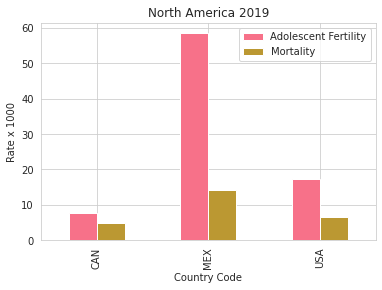

In [17]:
north_america.plot.bar(title='North America 2019',ylabel='Rate x 1000')

6.	Para observar la distribución de ambos indicadores en el mundo, para el 2019, construye un gráfico de histogramas independientes usando Matplotlib. Utiliza 5 bins y transparencia de 0.5.

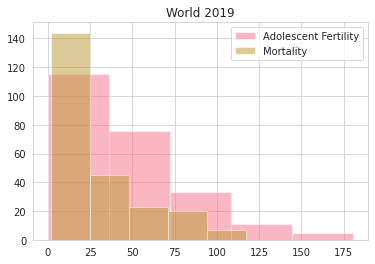

In [20]:
plt.hist('2019',data=adolescent_fertility,label='Adolescent Fertility',bins=5,alpha=0.5)  
plt.hist('2019',data=mortality,label='Mortality',bins=5,alpha=0.5)
plt.title('World 2019')
plt.legend()

7.	¿Cómo han cambiado estos índices en la última década? Compáralos con boxplots en los años 2009 y 2019. 

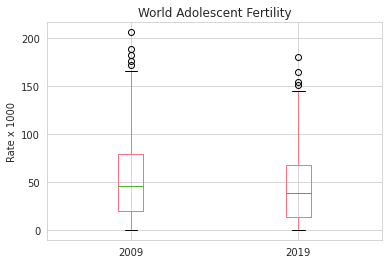

In [22]:
adolescent_fertility[['2009','2019']].plot.box(title='World Adolescent Fertility',ylabel='Rate x 1000')

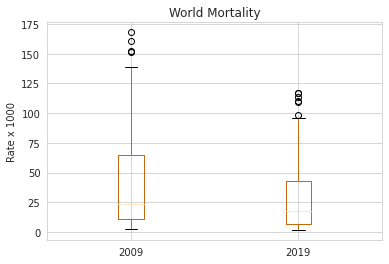

In [24]:
sns.set_palette('PuOr')
mortality[['2009','2019']].plot.box(title='World Mortality',ylabel='Rate x 1000')

8.	Emplea la plataforma Seaborn para graficar la relación entre las dos tasas en el 2019. Obtén además el índice de correlación numérico para la cuantificar la dependencia entre ambas variables.

Text(0, 0.5, 'Mortality rate x 1000')

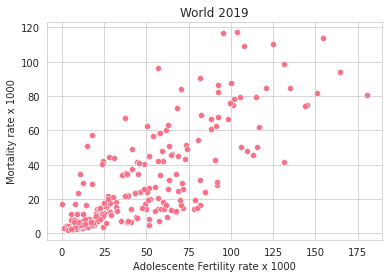

In [29]:
sns.set_palette('husl')
sns.scatterplot(x=adolescent_fertility['2019'],y=mortality['2019'])
plt.title('World 2019')
plt.xlabel('Adolescente Fertility rate x 1000')
plt.ylabel('Mortality rate x 1000')